In [4]:
from DCGAN_small import DCGAN
import torch
import pytorch_lightning as pl
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.auto import tqdm
%matplotlib inline

In [5]:
#250, 150
MODEL_PATH = "./lightning_logs/cifar10_dcgan_noise/checkpoints/epoch100.ckpt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
model = DCGAN()
model = model.load_from_checkpoint(MODEL_PATH).to(device)
model.eval()

DCGAN(
  (generator): Generator(
    (fc): Sequential(
      (0): Linear(in_features=100, out_features=8192, bias=True)
      (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (fc2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.2, inplace=True)
      (6): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (7): Tanh()
    )
  )
  (discriminator): Discriminator(
    (fc): Sequential(
      (0): Conv2d(3, 16, ke

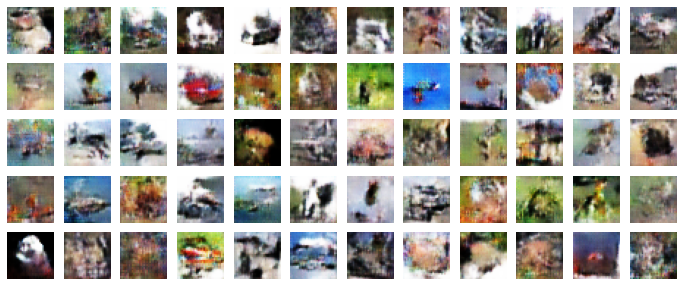

In [24]:
fig = plt.figure(figsize=(12,5))

for i in range(60):
    z = torch.randn((1,100)).to(device)
    img = model.generate(z)
    img = transforms.ToPILImage()(img).convert("RGB")
    
    plt.subplot(5, 12, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.savefig('./results/cifar10_dcgan.png', dpi=300)
plt.show()